In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 3]

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import pearsonr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Obtain and visualize data

In [2]:
## data obtained from https://datahub.io/core/global-temp#data
df = pd.read_csv("global_temps.csv")
df.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


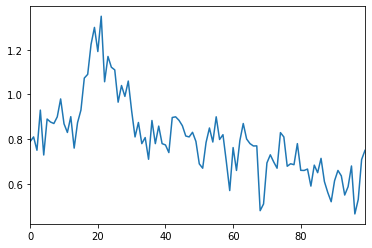

In [3]:
df.Mean[:100].plot()

## Exercise: what is wrong with the current shape of this data? How can we fix this?

In [7]:
 df = df.pivot(index='Date', columns='Source', values='Mean')

In [8]:
df.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


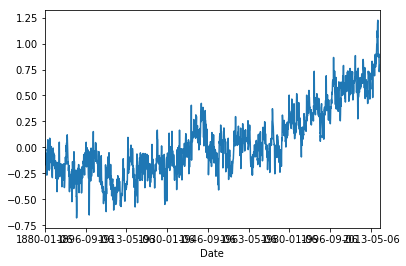

In [9]:
df.GCAG.plot()

In [10]:
type(df.index)

pandas.core.indexes.base.Index

## Exercise: how can we make the index better?

In [11]:
df.index = pd.to_datetime(df.index)

In [12]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

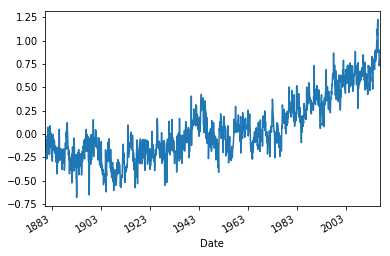

In [13]:
df.GCAG.plot()

In [14]:
df['1880']

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14
1880-06-06,-0.1692,-0.29
1880-07-06,-0.1491,-0.24
1880-08-06,-0.0725,-0.08
1880-09-06,-0.0817,-0.17


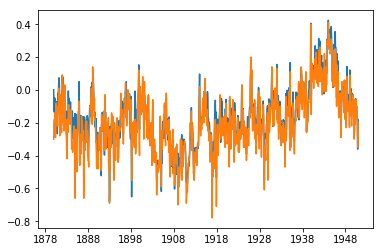

In [17]:
plt.plot(df['1880':'1950'][['GCAG', 'GISTEMP']])

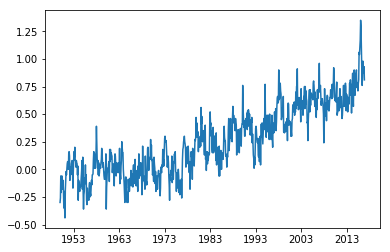

In [18]:
plt.plot(df['1950':][['GISTEMP']])

## How strongly do these measurements correlate contemporaneously? What about with a time lag?

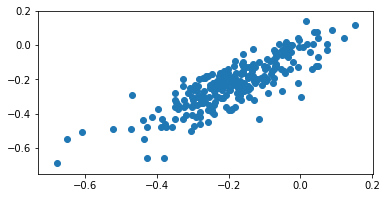

In [27]:
plt.scatter(df['1880':'1900'][['GCAG']], df['1880':'1900'][['GISTEMP']])

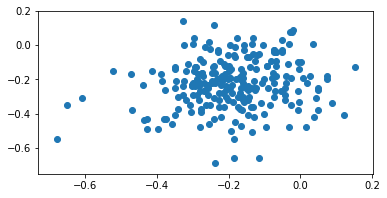

In [28]:
plt.scatter(df['1880':'1899'][['GCAG']], df['1881':'1900'][['GISTEMP']])

In [29]:
pearsonr(df['1880':'1899'].GCAG, df['1881':'1900'].GISTEMP)

(0.1546405732961276, 0.016502234730950686)

In [30]:
df['1880':'1899'][['GCAG']].head()

Source,GCAG
Date,
1880-01-06,0.0009
1880-02-06,-0.1229
1880-03-06,-0.1357
1880-04-06,-0.0499
1880-05-06,-0.0738


In [31]:
df['1881':'1900'][['GISTEMP']].head()

Source,GISTEMP
Date,
1881-01-06,-0.10
1881-02-06,-0.14
1881-03-06,0.01
1881-04-06,-0.03
1881-05-06,-0.04


In [32]:
min(df.index)

Timestamp('1880-01-06 00:00:00')

In [33]:
max(df.index)

Timestamp('2016-12-06 00:00:00')

## Unobserved component model

In [53]:
train = df['1960':]

### model parameters

In [100]:

# The restricted model forces a smooth trend
model = {
    'level': 'smooth trend', 'cycle': False, 'seasonal': None, 
}


### fitting a model

In [101]:
gcag_mod = sm.tsa.UnobservedComponents(train['GCAG'], **model)
gcag_res = gcag_mod.fit(method='powell', disp=False)

/home/aileen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [102]:
print(gcag_res.summary())

                        Unobserved Components Results                         
Dep. Variable:                   GCAG   No. Observations:                  684
Model:                   smooth trend   Log Likelihood                 603.825
Date:                Sat, 06 Jul 2019   AIC                          -1203.649
Time:                        18:41:38   BIC                          -1194.599
Sample:                             0   HQIC                         -1200.147
                                - 684                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0058      0.000     19.888      0.000       0.005       0.006
sigma2.trend         0.0001   2.09e-05      5.896      0.000    8.23e-05       0.000
Ljung-Box (Q):              

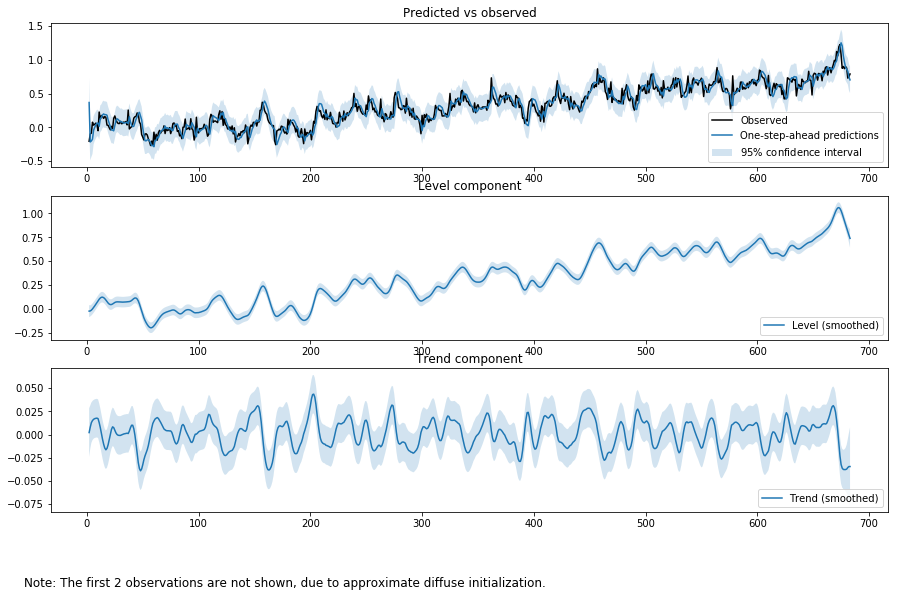

In [103]:
fig = gcag_res.plot_components(legend_loc='lower right', figsize=(15, 9));

## Exercise: Fit a local linear trend (less restrictive) instead of a smooth trend model


In [115]:

unrestricted_model = {
    'level': 'local linear trend'
}

In [116]:
gcag_mod = sm.tsa.UnobservedComponents(train['GCAG'], **unrestricted_model)
gcag_res = gcag_mod.fit(method='powell', disp=False)

/home/aileen/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [117]:
print(gcag_res.summary())

                        Unobserved Components Results                         
Dep. Variable:                   GCAG   No. Observations:                  684
Model:             local linear trend   Log Likelihood                 665.121
Date:                Sat, 06 Jul 2019   AIC                          -1324.242
Time:                        18:44:23   BIC                          -1310.667
Sample:                             0   HQIC                         -1318.988
                                - 684                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0036      0.000     12.402      0.000       0.003       0.004
sigma2.level         0.0026      0.000      7.427      0.000       0.002       0.003
sigma2.trend      5.992e-12 

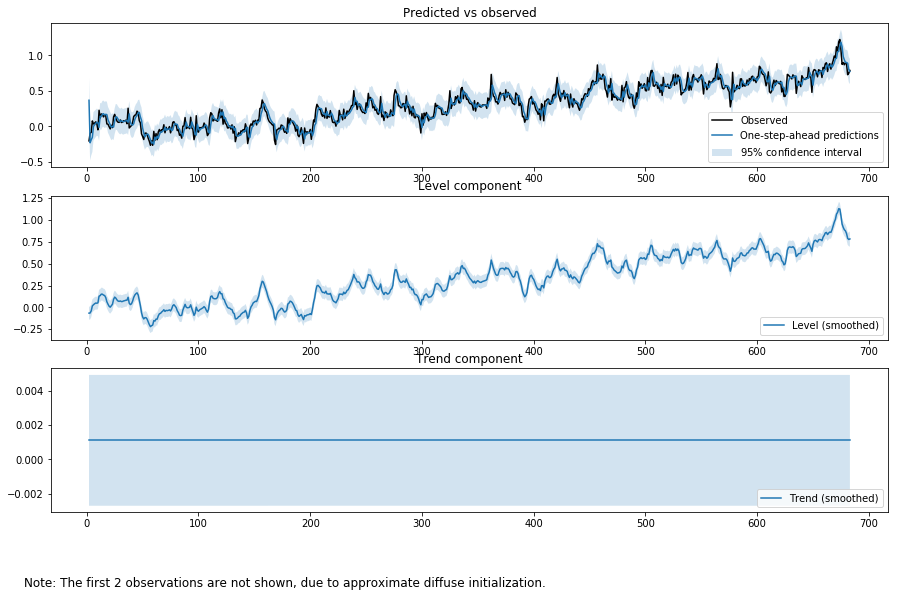

In [118]:
fig = gcag_res.plot_components(legend_loc='lower right', figsize=(15, 9));

## Generate future predictions

In [119]:
# Perform rolling prediction and multistep forecast
num_steps = 10
predict_res = gcag_res.get_prediction(dynamic=train['GCAG'].shape[0] - num_steps)

predict = predict_res.predicted_mean
ci = predict_res.conf_int()

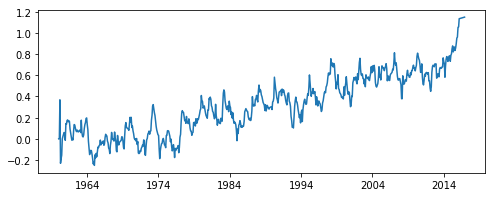

In [120]:
plt.plot(predict)

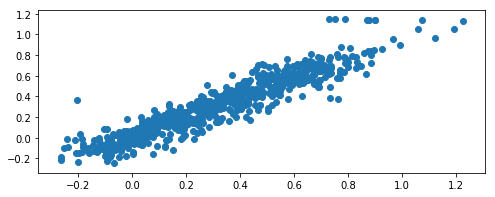

In [121]:
plt.scatter(train['GCAG'], predict)

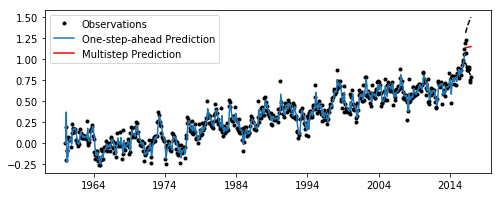

In [122]:
fig, ax = plt.subplots()
# Plot the results
ax.plot(train['GCAG'], 'k.', label='Observations');
ax.plot(train.index[:-ndynamic], predict[:-ndynamic], label='One-step-ahead Prediction');

ax.plot(train.index[-ndynamic:], predict[-ndynamic:], 'r', label='Multistep Prediction');
ax.plot(train.index[-ndynamic:], ci.iloc[-ndynamic:], 'k--');

# Cleanup the image
legend = ax.legend(loc='upper left');

## Exercise: consider adding a seasonal term or a cyclical term to either of the models fit above. Does this improve the fit of the model?

## Exercise: a common null model for time series is to predict the value at time t-1 for the value at time t. How does such a model compare to the models we fit here?